## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [273]:
# import libraries 

import pandas as pd
import numpy as np
import seaborn as sns  
import matplotlib.pyplot as plt 
from zipfile import ZipFile
import gzip
import sqlite3

## Box Office 

In [274]:
#loading the data 
#Loading Box Office Mojo Data, head
box_office = pd.read_csv(r'zippedData\bom.movie_gross.csv.gz')
box_office.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [275]:
#more insights to the Box Office 
box_office.shape

(3387, 5)

In [276]:
#ispecting the data 
box_office.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [277]:
#cleaning the data
box_office.isnull().sum() #returns the sum of all null values

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [278]:
#dropping rows in the studio column with missing values
clean_box_office = box_office.dropna(subset=['studio'])

#filling domestic gross and foreign gross with median (numerical column),
#why not mean? avoiding outliers
clean_box_office['domestic_gross'].fillna(clean_box_office['domestic_gross'].median(), inplace=True)

#there are strings in foreign_gross column,, converting to float
clean_box_office['foreign_gross'] = clean_box_office['foreign_gross'].str.replace(',', '').astype(float)

#back to filling 
clean_box_office['foreign_gross'].fillna(clean_box_office['foreign_gross'].median(), inplace=True)


#inspecting the cleaned data
clean_box_office.isnull().sum()

C:\Users\User\AppData\Local\Temp\ipykernel_16464\4093333249.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_box_office['domestic_gross'].fillna(clean_box_office['domestic_gross'].median(), inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_16464\4093333249.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_box_office['foreign_gross'] = clean_box_office['foreign_gross'].str.replace(',', '').astype(float)
C:\Users\User\AppData\Local\Temp\ipykernel_16464\4093333249.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

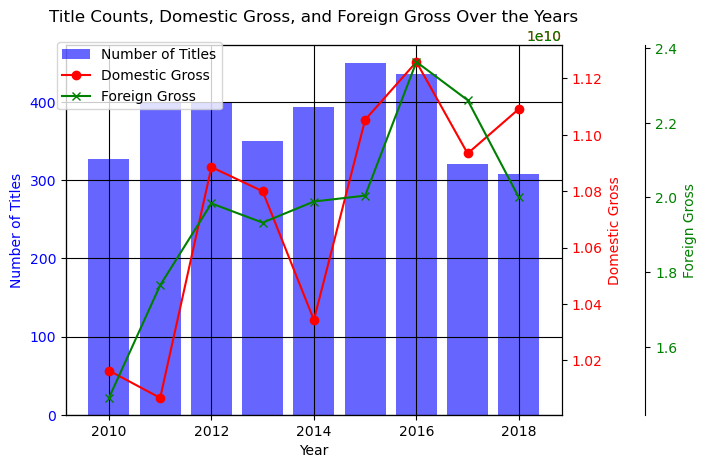

In [279]:
#visualization
# grouped by years to get title count and sum of domestic and foreign gross

clean_box_office_grouped = clean_box_office.groupby('year').agg({
    'title': 'count',
    'domestic_gross': 'sum',
    'foreign_gross': 'sum'
}).reset_index()

# subplots
fig, ax1 = plt.subplots()

# Bar plot for title counts
ax1.bar(clean_box_office_grouped['year'], clean_box_office_grouped['title'], color='blue', alpha=0.6, label='Number of Titles')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Titles', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

#second y-axis
ax2 = ax1.twinx()
ax2.plot(clean_box_office_grouped['year'], clean_box_office_grouped['domestic_gross'], color='red', marker='o', label='Domestic Gross')
ax2.set_ylabel('Domestic Gross', color='red')
ax2.tick_params(axis='y', labelcolor='red')

#third y-axis
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))
ax3.plot(clean_box_office_grouped['year'], clean_box_office_grouped['foreign_gross'], color='g', marker='x', label='Foreign Gross')
ax3.set_ylabel('Foreign Gross', color='g')
ax3.tick_params(axis='y', labelcolor='g')

#legend
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

#grid with pink color
ax1.grid(True, color='black')
ax2.grid(False)  #grid for the second y-axis not needed

#Title of the plot
plt.title('Title Counts, Domestic Gross, and Foreign Gross Over the Years')

#Show plot
plt.show()

In [280]:
clean_box_office.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

## IMDB 

In [281]:
from io import BytesIO

#loading imdb, 

#define the path
imdb_path = r'C:\Users\User\OneDrive\Desktop\phase 2 proj\dsc-phase-2-project-v3\zippedData\im.db.zip'




## Rotten Tomatoes

In [282]:
#Loading Rotten Tomatoes Data, head

#define the path
rt_file_path = r'C:\Users\User\OneDrive\Desktop\phase 2 proj\dsc-phase-2-project-v3\zippedData\rt.movie_info.tsv.gz'

#open the file with error handling 
with gzip.open(rt_file_path, 'rt', encoding= 'utf-8', errors= 'replace') as f:
    rotten_tomatoes = pd.read_csv(f, sep= '\t')


rotten_tomatoes.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [283]:
#ispecting the data 
rotten_tomatoes.shape

(1560, 12)

In [284]:
#cleaning the data
#checking null values
rotten_tomatoes.isnull().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [285]:
#checking duplicates in the id column
duplicate_count = rotten_tomatoes.duplicated(subset= 'id').sum()

#dropping duplicates in the id
id_clean = rotten_tomatoes.drop_duplicates(subset='id')

In [286]:
#cleaning data
#dropping rows in the synopsis and genre columns with missing values
clean_rotten_tomatoes = rotten_tomatoes.dropna(subset=['synopsis', 'genre'])



clean_rotten_tomatoes.isnull().sum() #returns the sum of all null values

id                 0
synopsis           0
rating             0
genre              0
director         174
writer           398
theater_date     297
dvd_date         297
currency        1155
box_office      1155
runtime           13
studio          1002
dtype: int64

In [287]:
clean_rotten_tomatoes.columns

Index(['id', 'synopsis', 'rating', 'genre', 'director', 'writer',
       'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime',
       'studio'],
      dtype='object')

## Rotten Tomatoes Reviews Data

In [288]:
#loading rotten tomatoes reviews data, head 

#path 
rtreviews_file_path = r'C:\Users\User\OneDrive\Desktop\phase 2 proj\dsc-phase-2-project-v3\zippedData\rt.reviews.tsv.gz'

#open the file with error handling 
with gzip.open(rtreviews_file_path, 'rt', encoding= 'utf-8', errors= 'replace') as f:
    rt_reviews = pd.read_csv(f, sep= '\t')


rt_reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [289]:
# Count occurrences of 'fresh'
fresh_count = rt_reviews['fresh'].value_counts().get('fresh', 0)

# Count occurrences of 'rotten'
rotten_count =  rt_reviews['fresh'].value_counts().get('rotten', 0)

print(f"Fresh: {fresh_count}")
print(f"Rotten: {rotten_count}")


Fresh: 33035
Rotten: 21397


In [290]:
#inspecting data 
rt_reviews.shape

(54432, 8)

In [291]:
#Cleaning data
rt_reviews.isnull().sum()

id                0
review         5563
rating        13517
fresh             0
critic         2722
top_critic        0
publisher       309
date              0
dtype: int64

In [292]:
#checking duplicates in the id column
duplicate_count = rt_reviews.duplicated(subset= 'id').sum()

#dropping duplicates in the id
rt_reviews_id_clean = rt_reviews.drop_duplicates(subset='id')

In [293]:
#cleaning data
#dropping rows in the review, critic and publisher columns with missing values
clean_rt_reviews = rt_reviews.dropna(subset=['review', 'critic', 'publisher'])

#cleaning rating column
def convert_rating(rating):
    try:
        if '/' in rating:
            num, denom = rating.split('/')
            return float(num)/ float(denom) * 10 #convert to a scale of 0-10
        else:
            return float(rating)
    except:
        return np.nan
    
clean_rt_reviews['rating'] = rt_reviews['rating'].apply(convert_rating)



#filling rating with median
clean_rt_reviews ['rating'].fillna(clean_rt_reviews['rating'].median(), inplace=True)

clean_rt_reviews.isnull().sum() #returns the sum of all null values 

C:\Users\User\AppData\Local\Temp\ipykernel_16464\637659777.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_rt_reviews['rating'] = rt_reviews['rating'].apply(convert_rating)
C:\Users\User\AppData\Local\Temp\ipykernel_16464\637659777.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_rt_reviews ['rating'].fillna(clean_rt_reviews['rating'].median(), inplace=True)


id            0
review        0
rating        0
fresh         0
critic        0
top_critic    0
publisher     0
date          0
dtype: int64

In [294]:
clean_rt_reviews.shape

(46662, 8)

## The Movie DB

In [295]:
#loading the TheMovieDB, head 
tmdb_movies = pd.read_csv(r'zippedData\tmdb.movies.csv.gz')
tmdb_movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [296]:
tmdb_movies.columns

Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')

In [297]:
#inspecting the data
tmdb_movies.shape

(26517, 10)

In [298]:
#cleaning the data
tmdb_movies.isnull().sum() #returns the sum of all null values

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [299]:
#drop the unnamed column
tmdb_movies.drop(columns=['Unnamed: 0'], inplace=True)

In [300]:
tmdb_movies.columns

Index(['genre_ids', 'id', 'original_language', 'original_title', 'popularity',
       'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')

In [301]:
#checking duplicates in the id column
duplicate_count = tmdb_movies.duplicated(subset= 'id').sum()

#dropping duplicates in the id
tmdb_id_clean = tmdb_movies.drop_duplicates(subset='id')

In [307]:
tmdb_id_clean.shape 

(25497, 9)

## The Number 

In [303]:
#loading The Numbers data, head 
tn_movies = pd.read_csv(r'zippedData\tn.movie_budgets.csv.gz')
tn_movies.tail()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0
5781,82,"Aug 5, 2005",My Date With Drew,"$1,100","$181,041","$181,041"


In [304]:
#inspecting the data 
tn_movies.shape

(5782, 6)

In [305]:
#checking null values
tn_movies.isnull().sum() #returns the sum of all null values

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [306]:
tn_movies.duplicated('id').sum()


5682

In [308]:
tn_movies.shape

(5782, 6)